# *Predicting Car Prices*

***In this project, we will predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.***

[Download](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)
[Documentation](https://archive.ics.uci.edu/ml/datasets/automobile)

***We will be using K-Nearset Neighbors algorithm to predict a Car's price accurately.***

## Exploring Data 

We will read data into a Dataframe. Since, the data file doesn't come with Header, we need to add proper column names.<br> Also, we will drop non-numerical columns which can't be used as features for our model.

In [28]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

cars = pd.read_csv('imports-85.csv')
print(cars.shape)
cars.head()

(204, 26)


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It looks like this dataset does not include the column names. We'll have to add in the column names manually using the [documentation](https://archive.ics.uci.edu/ml/datasets/automobile).

In [29]:
columns  = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
            'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 
            'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.csv', names=columns)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning and Preparation

The k-nearest neighbors algorithm uses the distance formula to determine the nearest neighbors. That means, we can only use numerical columns for this machine learning algorithm. Afterwards, we'll have to do a little bit of data cleaning. We will perform the following steps:

1. Replace missing and meaningless values like `?` with np.nan
- Convert String columns (which are actually numeric) to Numeric datatype
- Drop rows where target Column is missing/np.nan
- Replace missing/np.nan values for other places using the average values from that column.
- Normalize the Dataframe except Price Column

We can also seperate numerical columns given in the documentation as follows

In [30]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                          'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
                          'highway_mpg', 'price']

numeric_cars = cars[continuous_values_cols].copy()
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


1. Replace missing and meaningless values like `?` with np.nan

In [31]:
numeric_cars.replace('?', np.nan, inplace=True)

2. Convert String columns (which are actually numeric) to Numeric datatype

In [32]:
# Check columns which are of object type
text_cols = numeric_cars.select_dtypes(include=['object']).columns
print(text_cols)

numeric_cars[text_cols] = numeric_cars[text_cols].astype('float')

# Checking if any non-numerical column is left
numeric_cars.dtypes.value_counts()

Index(['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm',
       'price'],
      dtype='object')


float64    11
int64       3
dtype: int64

3. Drop rows where target Column is missing/np.nan

In [33]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars.dropna(subset=['price'], inplace=True)

# Checking if there is any null value
numeric_cars['price'].isnull().sum() 

0

4. Replace missing/np.nan values for other places using the average values from that column.

In [34]:
# Replace missing values in other columns using their respective column means.
numeric_cars.fillna(numeric_cars.mean(), inplace=True)
numeric_cars.isnull().sum().value_counts()

0    14
dtype: int64

The k-nearest neighbors algorithm uses the euclidean distance to determine the closest neighbor.

$$ Distance = \sqrt{{(q_1-p_1)}^2+{(q_2-p_2)}^2+...{(q_n-p_n)}^2} $$

Where q and p represent two rows and the subscript representing a column. However, each column have different scaling. For example, if we take row 2, and row 3. The peak RPM has a difference of 500, while the difference in width is 0.7. The algorithm will give extra weight towards the difference in peak RPM.

That is why it is important to normalize the dataset into a unit vector. After normalization we'll have values from -1 to 1. For more information on feature scaling click [here](https://en.wikipedia.org/wiki/Feature_scaling).

$$ x' = \frac{x - mean(x)}{x(max) - x(min)}$$

In pandas this would be:

$$ df' = \frac{df - df.mean()}{df.max() - df.min()}$$

Where df is any dataframe.

-------------
5. Normalize the Dataframe except Price Column

In [35]:
# Normalizing The Dataframe
normalised_cars = (numeric_cars.max() - numeric_cars)/numeric_cars.max()
normalised_cars['price'] = numeric_cars['price']
normalised_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,13495.0
1,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,16500.0
2,0.523438,0.218362,0.177319,0.090278,0.123746,0.305706,0.319797,0.167866,0.608696,0.412214,0.242424,0.612245,0.518519,16500.0
3,0.359375,0.174524,0.151370,0.080556,0.091973,0.425234,0.190355,0.184652,0.565217,0.610687,0.166667,0.510204,0.444444,13950.0
4,0.359375,0.177833,0.151370,0.077778,0.091973,0.305460,0.190355,0.184652,0.652174,0.561069,0.166667,0.632653,0.592593,17450.0


### Applying Machine Learning

> **K-Nearest Neighbors**<br>
Suppose we have a dataframe named 'train', and a row named 'test'. The idea behind k-nearest neighbors is to find k number of rows from 'train' with the lowest distance to 'test'. Then we can determine the average of the target column of 'train' of those five rows and return the result to 'test'.

***We will create a `knn_train_test` function which uses KNeighborsRegressor class from scikit-learn.***

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature, target, df):
    
    # Randomizing the Dataset
    np.random.seed(1)
    new_df = df.iloc[np.random.permutation(len(df))].copy()
    
    # Divide the data in half
    half_point = int(len(df)/2)
    train_df = new_df[:half_point]
    test_df = new_df[half_point:]
    
    # Fit a KNN Model using default K value
    knn = KNeighborsRegressor()
    knn.fit(train_df[[feature]], train_df[target])
    
    # Making predictions using the model
    predictions = knn.predict(test_df[[feature]])
    
    # Calculate and return RMSE Value
    rmse = np.sqrt(mean_squared_error(test_df[target], predictions))
    return rmse

This function will train and test univariate models.

**First, we will evaluate which features give us the most accurate prediction.**

In [68]:
# Extracting all feature names except price 
columns  = normalised_cars.columns.tolist()
columns.remove('price')

# Create a dictionary of RMSE Values aling with Features
rmse_results = {}

for col in columns:
    rmse_results[col] = knn_train_test(col, 'price', normalised_cars)

# Converting dictionary into Series and sorting it to display results
rmse_results = pd.Series(rmse_results)    
rmse_results.sort_values()

horsepower           4007.472352
curb_weight          4437.934395
highway_mpg          4579.037250
width                4644.898429
city_mpg             4729.673421
length               5382.671155
wheel_base           5527.682489
compression_ratio    6736.676353
bore                 6816.853712
height               7487.652519
peak_rpm             7498.746475
normalized_losses    7635.170416
stroke               8078.491289
dtype: float64

It looks like `horsepower` feature gives us the least amount of error. We should definitely keep this list in mind when using the function for multiple features.

But, we need explore further. Let's modify the function to include k value or the number of neighbors as a parameter. Then we can loop through a list of K values and features to determine which K value and features are most optimal in our machine learning model.

***Modifying the `knn_train_test()` function to accept `k` value as a parameter.***

In [77]:
def knn_train_test2(feature, target, df, k_value):
    # Randomizing the Dataset
    np.random.seed(1)
    new_df = df.iloc[np.random.permutation(len(df))].copy()
    
    # Divide the data in half
    half_point = int(len(df)/2)
    train_df = new_df[:half_point]
    test_df = new_df[half_point:]
    
    k_results = []
    
    # Fitting the model wih k neighbors
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[feature]], train_df[target])
    
        # Making predictions using the model
        predictions = knn.predict(test_df[[feature]])

        # Calculate and return RMSE Value
        rmse = np.sqrt(mean_squared_error(test_df[target], predictions))
        k_results.append(rmse)
    
    return k_results

***Training, and testing a univariate model using following `k` values `(1, 3, 5, 7, and 9)`***

In [78]:
# K Nearest Neighbors
k_values = [1, 3, 5, 7, 9]

# Create a dictionary of RMSE Values along with Features
k_rmse_results = {}

# Looping through all the features
for col in columns:
    k_rmse_results[col] = knn_train_test2(col, 'price', normalised_cars, k_values)
    
k_rmse_results

{'normalized_losses': [7906.594141025014,
  6712.873355379836,
  7635.170416092379,
  7870.651003239241,
  8221.578465544319],
 'wheel_base': [5964.682235317891,
  5246.472910232148,
  5527.682488732292,
  5485.683033525724,
  5734.4339857054465],
 'length': [5291.785164547288,
  5267.216777678541,
  5382.671155138166,
  5396.362242025737,
  5420.547916432259],
 'width': [4453.161424568767,
  4697.287114550659,
  4644.898428543422,
  4562.1341847495605,
  4643.882339393336],
 'height': [9108.471836593655,
  8049.98714728832,
  7487.652518884965,
  7753.797418084058,
  7695.632426557866],
 'curb_weight': [5518.883237405808,
  5048.607726036669,
  4437.934394635539,
  4369.349089851214,
  4632.205545221074],
 'bore': [7496.149231240644,
  6936.9888741632,
  6816.8537123691885,
  7062.061305053834,
  6869.727437364902],
 'stroke': [7282.34885878108,
  7664.984030806539,
  8078.491288735677,
  7754.483859461689,
  7723.913153845065],
 'compression_ratio': [9024.902677953633,
  7033.5529229

***Visualising `RMSE`s for various `K` and `Features`***

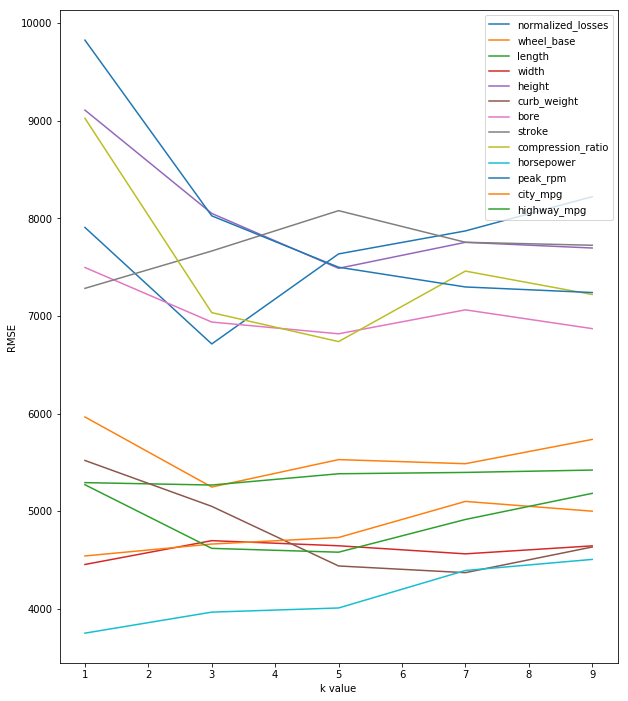

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 12))

for k,v in k_rmse_results.items():
    x = [1, 3, 5, 7, 9]
    y = v
    
    plt.plot(x, y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.legend()
plt.show()

The visualisation isn't very helpful. Let's arrange the *Avg. RMSE (Root Mean Squared Error)* and *features* in a sorted manner. 

***Finding best `features` (with lowest `RMSE`s)***

In [80]:
# Getting average RMSE across different `k` values for each feature.
feature_rmse = {}

for k,v in k_rmse_results.items():
    avg_rmse = np.mean(v)
    feature_rmse[k] = avg_rmse
    
top_features = pd.Series(feature_rmse).sort_values()
top_features

horsepower           4123.737847
width                4600.272698
curb_weight          4801.395999
city_mpg             4806.213763
highway_mpg          4912.751353
length               5351.716651
wheel_base           5591.790931
bore                 7036.356112
compression_ratio    7494.726126
normalized_losses    7669.373476
stroke               7700.844238
peak_rpm             7977.094835
height               8019.108269
dtype: float64

***The above table reiterates our finding from our earlier that `horsepower` gives least amount of error.***

## Multivariate Model

***Now, we will optimize `knn_train_test` function to work along with multiple features at once.***

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test3(features, target, df):
    # Randomizing the Dataset
    np.random.seed(1)
#     new_df = df.iloc[np.random.permutation(len(df))].copy()
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Divide the data in half
    half_point = int(len(df)/2)
    train_df = new_df[:half_point]
    test_df = new_df[half_point:]
    
    # Fitting the model wih k neighbors
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[target])
    
    # Making predictions using the model
    predictions = knn.predict(test_df[features])

    # Calculate and return RMSE Value
    rmse = np.sqrt(mean_squared_error(test_df[target], predictions))
    return rmse

***Applying this function with top features (having lowest amount of error), will further improve accuracy of our model.***

In [82]:
rmse_results = {}

rmse_results['Top Two Features'] = knn_train_test3(top_features[:2].index, 'price', normalised_cars)
rmse_results['Top Three Features']  = knn_train_test3(top_features[:3].index, 'price', normalised_cars)
rmse_results['Top Four Features'] = knn_train_test3(top_features[:4].index, 'price', normalised_cars)
rmse_results['Top Five Features'] = knn_train_test3(top_features[:5].index, 'price', normalised_cars)

# Displaying results sorted as per the RMSEs
pd.Series(rmse_results).sort_values()

Top Three Features    3212.559631
Top Four Features     3232.103629
Top Five Features     3346.673710
Top Two Features      3681.398092
dtype: float64

We got the least error from Top `Three` Features followed by `Four` and `Five` features.

## Hyperparameter Tuning

***Now, let's try varying the `K` values. We can further tune our machine learning model by finding the optimal `K` value to use.***

In [98]:
def knn_train_test_hyp(feature, target, df, k_value):
    # Randomizing the Dataset
    np.random.seed(1)
    new_df = df.iloc[np.random.permutation(len(df))].copy()
    
    # Divide the data in half
    half_point = int(len(df)/2)
    train_df = new_df[:half_point]
    test_df = new_df[half_point:]
    
    k_results = []
    
    # Fitting the model wih k neighbors
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[feature], train_df[target])
    
        # Making predictions using the model
        predictions = knn.predict(test_df[feature])

        # Calculate and return RMSE Value
        rmse = np.sqrt(mean_squared_error(test_df[target], predictions))
        k_results.append(rmse)
    
    return k_results

In [103]:
# Training and Testing on all, five and four features
col_names = ['Top Three', 'Top Four', 'Top Five']
k_values = [x for x in range(1, 26)]

rmse_results = {}

for i in range(3):
    rmse = knn_train_test_hyp(top_features[:i+3].index, 'price', normalised_cars, k_values)    
    rmse_results['{} Features'.format(col_names[i])] = rmse
    
rmse_results

{'Top Three Features': [3308.749941929402,
  3044.812909435545,
  3042.2117028741623,
  2958.964739955848,
  3212.559630605792,
  3542.300773674804,
  3801.5597829031262,
  4007.750148478564,
  4074.3452185932656,
  4225.049450691918,
  4338.899164938664,
  4428.084138858935,
  4496.362136550291,
  4540.135725202859,
  4614.027297973717,
  4654.474275823789,
  4714.058094964864,
  4645.9886513064885,
  4628.211244787356,
  4665.099200570483,
  4648.5009310888045,
  4610.013405029357,
  4642.836735468625,
  4669.567677732765,
  4719.453932620881],
 'Top Four Features': [3135.5489073677436,
  2514.1812009849527,
  2788.551941742018,
  2917.4679936225316,
  3232.103629232672,
  3566.725419074407,
  3834.980480987282,
  3927.395248759061,
  4078.9765839753827,
  4199.8376270003955,
  4345.006990461182,
  4451.387011302762,
  4550.163468300828,
  4591.534016042883,
  4630.39964268281,
  4711.911798285828,
  4692.337273008159,
  4709.187223643583,
  4698.1962740829795,
  4738.548781458035,
 

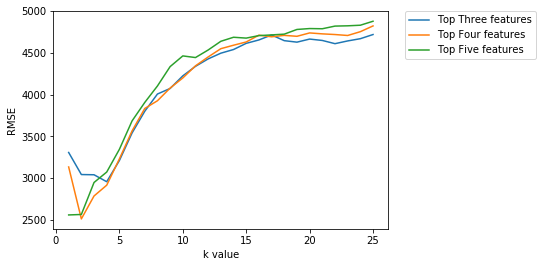

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange

labels = ['{} features'.format(x) for x in col_names]

for k,v in rmse_results.items():
    x = np.arange(1, 26, 1)
    y = v
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

In [111]:
# Getting Min. RMSE across different `k` values for each feature combination.
k_rmse = {}


for k,v in rmse_results.items():
    min_rmse = min(v)
    k_rmse[min_rmse] = [k, v.index(min_rmse)+1]
    
pd.Series(k_rmse).sort_index()

2514.181201     [Top Four Features, 2]
2561.731904     [Top Five Features, 1]
2958.964740    [Top Three Features, 4]
dtype: object

From last two cells, we can observe that choosing the best `four features` with a `K value of 2` will give us the `lowest RMSE of 2514`.

### K-Fold Cross Validation

We can improve our model by splitting data into more then 2 folds. Now, we can use cross validation with KFold and check how many `splits` may help us predict price in a better way.

In [119]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
rmse_scores = {}

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=2)
    
    mses = cross_val_score(knn, normalised_cars[top_features[:4].index], normalised_cars["price"], 
                           scoring="neg_mean_squared_error", cv=kf)
    
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    
    rmse_scores[avg_rmse] = [str(fold) + ' folds']
    
pd.Series(rmse_scores).sort_index()
#     print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

2416.119787    [21 folds]
2460.825451     [9 folds]
2478.254376    [15 folds]
2489.796459    [23 folds]
2496.384436    [17 folds]
2551.093087    [19 folds]
2586.700720    [11 folds]
2601.038381    [10 folds]
2605.380154     [7 folds]
2650.294806     [5 folds]
2670.410517    [13 folds]
2721.148255     [3 folds]
dtype: object

***Here, we can observe that the least RMSE score of `2416.12` is shown when `folds(data divisions) = 21`, `k = 2` along with top four features, which are `horsepower, width, curb_weight and city_mpg`.***

***That is it for now though, the goal of this project is to explore the fundamentals of K-Nearest Neighbors.***